## Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

## Load the Books

In [2]:
book_list = os.listdir("../dataset_02_personally_collected_data/data_before_processing")
book_list

['william_shakespeare-macbeth.txt',
 'f_scott_fitzgerald-the_beautiful_and_damned.txt',
 'oscar_wilde-the_picture_of_dorian_gray.txt',
 'mark_twain-the_adventures_of_tom_sawyer_part_4.txt',
 'jane_austen-pride_and_prejudice.txt',
 'george_eliot-the_mill_on_the_floss.txt',
 'charles_dickens-great_expectations.txt',
 'charles_dickens-the_mystery_of_edwin_drood.txt',
 'mark_twain-adventures_of_huckleberry_finn.txt',
 'william_shakespeare-alls_well_that_ends_well.txt',
 'mark_twain-the_adventures_of_tom_sawyer_part_3.txt',
 'james_joyce-ulysses.txt',
 'charles_dickens-oliver_twist.txt',
 'jane_austen-emma.txt',
 'mark_twain-the_adventures_of_tom_sawyer_part_1.txt',
 'mark_twain-the_adventures_of_tom_sawyer_part_5.txt',
 'f_scott_fitzgerald-this_side_of_paradise.txt',
 'joseph_conrad-the_rover.txt',
 'oscar_wilde-an_ideal_husband.txt',
 'virginia_woolf-mrs_dalloway.txt',
 'virginia_woolf-night_and_day.txt',
 'oscar_wilde-the_importance_of_being_earnest__a_trivial_comedy_for_serious_people.t

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/quantigo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/quantigo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/quantigo/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/quantigo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/quantigo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Creating Book Dataframe

In [4]:
import os
import pandas as pd

def parse_filename(filename):
    """
    Parse the filename to extract the author and book name.
    Assumes filename format is 'name-of-author_book-name.txt'
    """
    # Remove the file extension and split by the first underscore
    author, book_name = filename[:-4].split('-', 1)
    # Replace hyphens with spaces for author and book name
    author = author.replace('_', ' ')
    book_name = book_name.replace('_', ' ')
    return book_name, author

def process_files_for_metadata(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            book_name, author = parse_filename(filename)
            data.append({'Book Name': book_name, 'Author': author})
    return data

def create_metadata_dataframe(data):
    """
    Create a dataframe from the provided metadata list
    """
    return pd.DataFrame(data)

# Change 'your-directory-path' to the path of the directory containing your txt files
directory_path = '../dataset_02_personally_collected_data/data_before_processing'
metadata = process_files_for_metadata(directory_path)
metadata_df = create_metadata_dataframe(metadata)
print(metadata_df.head())
# metadata_df.to_csv('../dataset_02_personally_collected_data/data_after_processing/books_df.csv', index=False)  # Save the dataframe to a CSV file


                             Book Name               Author
0                              macbeth  william shakespeare
1             the beautiful and damned   f scott fitzgerald
2           the picture of dorian gray          oscar wilde
3  the adventures of tom sawyer part 4           mark twain
4                  pride and prejudice          jane austen


### Creating Sentence Dataframe

In [5]:
import os
import re
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

def extract_author(filename):
    """
    Extract the author's name from the filename.
    Assumes filename format is 'name-of-author_book-name.txt'
    """
    return filename.split('_')[0].replace('-', ' ')

def process_files(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            author = extract_author(filename)
            path = os.path.join(directory, filename)
            with open(path, 'r', encoding='utf-8') as file:
                text = file.read()
                sentences = sent_tokenize(text)
                if len(sentences) > 200:
                    sampled_sentences = sentences[:200]
                else:
                    sampled_sentences = sentences
                for sentence in sampled_sentences:
                    data.append({'Text': sentence, 'Label': author})
    return data

def create_dataframe(data):
    """
    Create a dataframe from the provided data list
    """
    return pd.DataFrame(data)

# Change 'your-directory-path' to the path of the directory containing your txt files
directory_path = '../dataset_02_personally_collected_data/data_before_processing'
data = process_files(directory_path)
df = create_dataframe(data)
print(df.head())


[nltk_data] Downloading package punkt to /home/quantigo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                     Text    Label
0      ﻿ACT I\n\nSCENE I.  william
1          An open Place.  william
2  Thunder and Lightning.  william
3    Enter three Witches.  william
4            FIRST WITCH.  william


In [6]:
#checking first sentences
df["Text"][1]

'An open Place.'

In [7]:
df["Label"].unique()

array(['william', 'f', 'oscar', 'mark', 'jane', 'george', 'charles',
       'james', 'joseph', 'virginia'], dtype=object)

In [8]:
# df.to_csv('../dataset_02_personally_collected_data/data_after_processing/', index=False)  # Save the dataframe to a CSV file

In [9]:
df

,Text,Label
0,﻿ACT I\n\nSCENE I.,william
1,An open Place.,william
2,Thunder and Lightning.,william
3,Enter three Witches.,william
4,FIRST WITCH.,william
...,...,...
7795,Mr. Casaubon would think that her uncle had so...,george
7796,When the two girls were in the drawing-room al...,george
7797,He is one of the most distinguished-looking me...,george
7798,He\nis remarkably like the portrait of Locke.,george


In [10]:
df["cleaned_text"] = df["Text"].apply(lambda x: x.lower().strip().replace('\n', ' ').replace('\r', ' ').replace('act','').replace('chapter','').replace('prologue','').replace('scene',''))
df

,Text,Label,cleaned_text
0,﻿ACT I\n\nSCENE I.,william,﻿ i i.
1,An open Place.,william,an open place.
2,Thunder and Lightning.,william,thunder and lightning.
3,Enter three Witches.,william,enter three witches.
4,FIRST WITCH.,william,first witch.
...,...,...,...
7795,Mr. Casaubon would think that her uncle had so...,george,mr. casaubon would think that her uncle had so...
7796,When the two girls were in the drawing-room al...,george,when the two girls were in the drawing-room al...
7797,He is one of the most distinguished-looking me...,george,he is one of the most distinguished-looking me...
7798,He\nis remarkably like the portrait of Locke.,george,he is remarkably like the portrait of locke.


In [11]:
#removing the chapter/act/prologue rows
pattern = r'\b(ACT|CHAPTER)\s+[IVXLCDM]+'

# Filter rows that match the pattern
filtered_df = df[~df['Text'].str.contains(pattern, case=True, na=False, regex=True)]

/tmp/ipykernel_5842/2736116784.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df = df[~df['Text'].str.contains(pattern, case=True, na=False, regex=True)]


In [12]:
filtered_df

,Text,Label,cleaned_text
1,An open Place.,william,an open place.
2,Thunder and Lightning.,william,thunder and lightning.
3,Enter three Witches.,william,enter three witches.
4,FIRST WITCH.,william,first witch.
5,When shall we three meet again?,william,when shall we three meet again?
...,...,...,...
7795,Mr. Casaubon would think that her uncle had so...,george,mr. casaubon would think that her uncle had so...
7796,When the two girls were in the drawing-room al...,george,when the two girls were in the drawing-room al...
7797,He is one of the most distinguished-looking me...,george,he is one of the most distinguished-looking me...
7798,He\nis remarkably like the portrait of Locke.,george,he is remarkably like the portrait of locke.


In [13]:
filtered_df["Label"].value_counts()

Label
mark        1980
charles      994
james        600
joseph       600
f            599
oscar        599
william      598
virginia     597
george       595
jane         589
Name: count, dtype: int64

In [14]:
# filtered_df.to_csv("filtered_df.csv", index=False)

### Balancing the dataset

In [15]:
# Determine the minimum count to downsample to
min_count = filtered_df['Label'].value_counts().min()

# Downsample each group
balanced_df = filtered_df.groupby('Label').sample(n=min_count, random_state=42)
balanced_df["Label"].value_counts()

Label
charles     589
f           589
george      589
james       589
jane        589
joseph      589
mark        589
oscar       589
virginia    589
william     589
Name: count, dtype: int64

In [16]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder=LabelEncoder()
# y= label_encoder.fit_transform(balanced_df['Label'])
# balanced_df['Label']=y
# balanced_df

In [17]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")

/home/quantigo/anaconda3/envs/ml/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
import spacy
import string
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)

{'was', 'perhaps', 'afterwards', 'empty', 'more', 'therein', 'without', 'me', 'before', 'show', 'his', 'were', 'just', 'six', 'within', 'have', 'will', 'cannot', 'top', 'beside', 'too', 'latterly', 'myself', '‘ve', 'very', 'regarding', 'they', 'none', 'yet', 'sometime', '‘ll', '’ve', '’d', 'though', 'always', 'beyond', 'namely', 'whither', 'down', 'various', 'made', 'towards', 'it', 'became', 'noone', '’s', 'with', 'often', 'now', 'that', "'re", 'serious', 'back', 'also', 'some', 'whereas', 'alone', 'keep', 'hereupon', 'ca', 'something', 'never', 'seems', 'go', 'would', 'whether', 'although', 'at', 'hundred', 'amount', 'along', 'side', 'here', 'becomes', 'these', 'those', 'herein', 'over', 'either', 'whole', 'whose', 'anywhere', 'them', 'mine', 'and', 'upon', 'wherever', 'ourselves', 'already', 'someone', 'meanwhile', 'should', 'behind', 'could', 'above', 'many', 'nothing', 'has', 'of', 'am', 'only', 'an', 'into', 'every', 'put', 'to', 'become', 'this', 'or', 'because', 'thru', 'you', 

In [19]:
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [20]:
#creating the tokenizer function
def spacy_tokenizer(sentence):
    #creating our token object
    doc = nlp(sentence)
    #Lemmetizing each token and converting into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in doc]
    #removing stopwords
    mytokens = [word for word in mytokens if word not in stop_words and word not in punctuations]
    sentence = " ".join(mytokens)
    return sentence
    

In [21]:
balanced_df["tokenized"] = balanced_df["Text"].apply(spacy_tokenizer)
balanced_df["embeddings"] = balanced_df["tokenized"].apply(model.encode)
balanced_df

,Text,Label,cleaned_text,tokenized,embeddings
7125,"The bedstead is a\nfour-poster, with a deal of...",charles,"the bedstead is a four-poster, with a deal of ...",bedstead poster deal old hanging valance proba...,"[0.023920335, -0.022470959, -0.11638585, -0.02..."
2529,Which was a capital way of raising his spirits...,charles,which was a capital way of raising his spirits...,capital way raise spirit ease,"[0.0836094, 0.040902767, 0.044132117, 0.012567..."
2571,The gruel disappeared; the boys\nwhispered eac...,charles,the gruel disappeared; the boys whispered each...,gruel disappear boy whisper wink oliver neighb...,"[-0.05719372, 0.018045763, 0.03403728, -0.0326..."
5061,It was at supper-time that this gentleman came...,charles,it was at supper-time that this gentleman came...,supper time gentleman come force,"[-0.052732874, 0.07539672, -0.01941531, -0.051..."
7132,"The Luggage so got the better of me, that inst...",charles,"the luggage so got the better of me, that inst...","luggage instead dust wash wet cloth,--previous...","[0.004779816, 0.030770723, 0.08989184, 0.04310..."
...,...,...,...,...,...
1939,"I would I had that corporall soundnesse now,\n...",william,"i would i had that corporall soundnesse now, a...",corporall soundnesse thy father selfe friendsh...,"[-0.027128022, -0.008946977, -0.0067334617, -0..."
13,SECOND WITCH.,william,second witch.,second witch,"[0.016472217, -0.06733602, -0.072845176, 0.011..."
182,"And, for an earnest of a greater honour,\nHe b...",william,"and, for an earnest of a greater honour, he ba...",earnest great honour bade thee thane cawdor ad...,"[-0.098243654, 0.060790323, 0.053172335, -0.04..."
5615,They may give the dozen white luces in their\n...,william,they may give the dozen white luces in their c...,dozen white luce coat,"[-0.010318819, 0.13000411, 0.014179432, 0.0182..."


In [22]:
# balanced_df.to_csv("balanced_tokenized_embedded_df.csv",index=False)

<Axes: xlabel='Label', ylabel='count'>

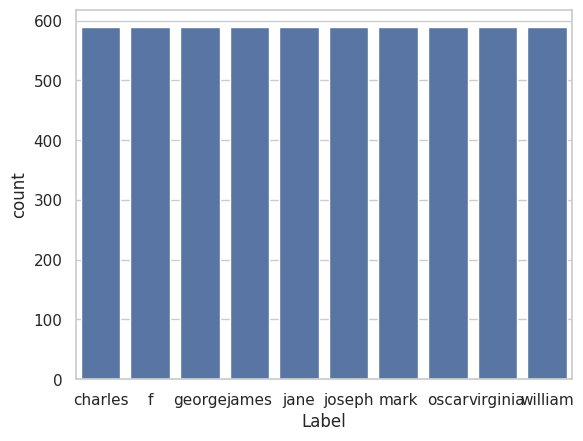

In [23]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.countplot(x=balanced_df["Label"])
     

Text(0.5, 0.98, 'Distribution of text length for text.')

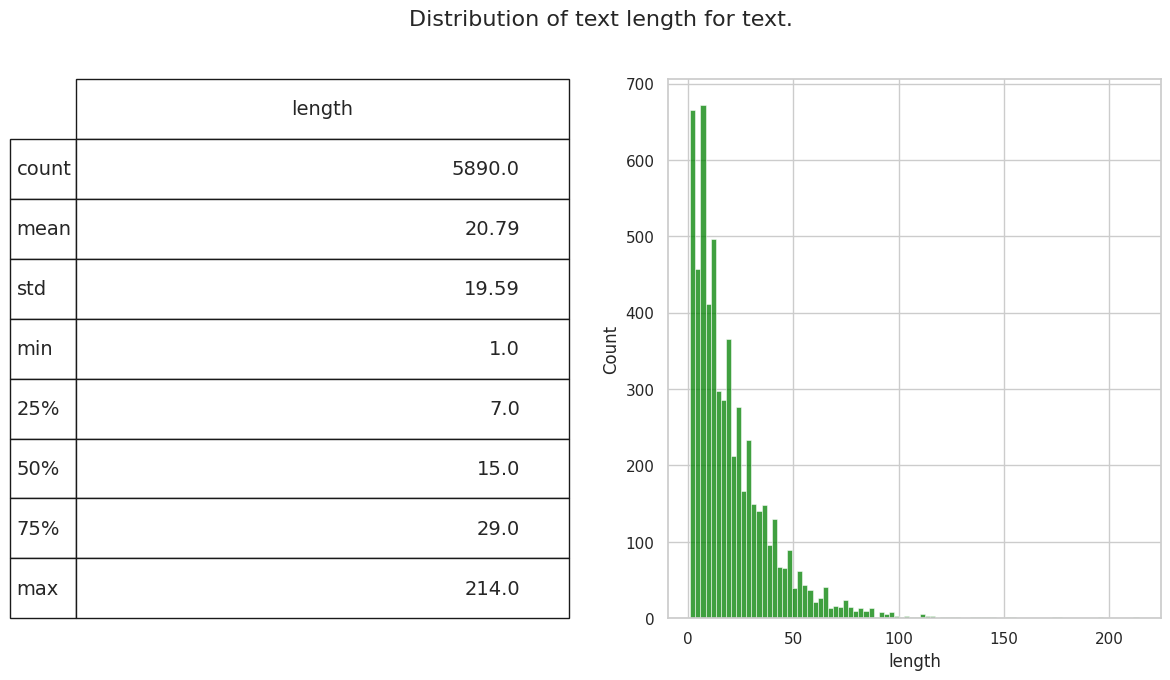

In [24]:
fig = plt.figure(figsize=(14,7))
balanced_df['length'] = balanced_df.cleaned_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(balanced_df['length'], ax=ax1,color='green')
describe = balanced_df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for text.', fontsize=16)


In [25]:
x_train, x_test, y_train, y_test = train_test_split(balanced_df["cleaned_text"],balanced_df["Label"], test_size = 0.2, random_state = 42)    
count_vect = CountVectorizer(ngram_range=(1, 2))        
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

(4712, 67593) (1178, 67593) (4712,) (1178,)


## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score

lr = LogisticRegression(C = 10, max_iter = 1000, n_jobs=-1)
lr.fit(x_train_tfidf, y_train)
y_pred1 = lr.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Accuracy: 0.6213921901528013
              precision    recall  f1-score   support

     charles       0.62      0.56      0.59       134
           f       0.64      0.52      0.57       122
      george       0.65      0.74      0.69       126
       james       0.64      0.56      0.60       115
        jane       0.65      0.73      0.68       113
      joseph       0.50      0.57      0.54       103
        mark       0.50      0.55      0.52       111
       oscar       0.58      0.62      0.60       119
    virginia       0.58      0.58      0.58       106
     william       0.85      0.78      0.81       129

    accuracy                           0.62      1178
   macro avg       0.62      0.62      0.62      1178
weighted avg       0.63      0.62      0.62      1178



In [30]:
from sklearn.svm import SVC

svc = SVC(kernel="linear",degree=10)
svc.fit(x_train_tfidf, y_train)
y_pred1 = svc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

Accuracy: 0.5959252971137521
              precision    recall  f1-score   support

     charles       0.57      0.53      0.55       134
           f       0.58      0.49      0.53       122
      george       0.61      0.69      0.65       126
       james       0.65      0.53      0.58       115
        jane       0.70      0.69      0.69       113
      joseph       0.44      0.57      0.50       103
        mark       0.47      0.50      0.49       111
       oscar       0.56      0.64      0.60       119
    virginia       0.56      0.52      0.54       106
     william       0.86      0.77      0.81       129

    accuracy                           0.60      1178
   macro avg       0.60      0.59      0.59      1178
weighted avg       0.60      0.60      0.60      1178



In [34]:
X = balanced_df["embeddings"].to_list()
y = balanced_df["Label"].to_list()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
y_train

['mark',
 'william',
 'charles',
 'william',
 'mark',
 'william',
 'william',
 'virginia',
 'jane',
 'james',
 'oscar',
 'charles',
 'jane',
 'f',
 'f',
 'james',
 'charles',
 'mark',
 'joseph',
 'mark',
 'george',
 'james',
 'james',
 'james',
 'oscar',
 'charles',
 'joseph',
 'charles',
 'virginia',
 'jane',
 'f',
 'f',
 'f',
 'joseph',
 'f',
 'mark',
 'james',
 'virginia',
 'james',
 'william',
 'oscar',
 'jane',
 'george',
 'mark',
 'george',
 'mark',
 'joseph',
 'virginia',
 'oscar',
 'virginia',
 'jane',
 'oscar',
 'charles',
 'william',
 'jane',
 'virginia',
 'mark',
 'james',
 'virginia',
 'james',
 'charles',
 'george',
 'jane',
 'james',
 'mark',
 'virginia',
 'mark',
 'mark',
 'f',
 'virginia',
 'charles',
 'virginia',
 'george',
 'william',
 'joseph',
 'f',
 'virginia',
 'charles',
 'oscar',
 'jane',
 'james',
 'jane',
 'jane',
 'joseph',
 'oscar',
 'mark',
 'james',
 'james',
 'william',
 'oscar',
 'mark',
 'george',
 'charles',
 'virginia',
 'f',
 'william',
 'virginia',


In [38]:

model = SVC(C=100,degree=2,kernel="poly")
model.fit(X_train, y_train)

SVC(C=100, degree=2, kernel='poly')

In [39]:
from sklearn import metrics
predicted = model.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test,predicted))

Accuracy:  0.5424448217317487


In [40]:
# for i in range(1,100):
#     model = SVC(kernel="poly", degree=i, C=100)
#     model.fit(X_train, y_train)
#     print("Accuracy on Testing Data: \t",model.score(X_test,y_test))
#     print("Accuracy on Training Data: \t",model.score(X_train,y_train))

In [42]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'C': [0.1,1,100,1000],
#     'kernel': ['rbf','poly','linear','sigmoid'],
#     'degree': [1,2,3,4,5,6]   
# }

# grid = GridSearchCV(SVC(),param_grid)
# grid.fit(X_train, y_train)

In [43]:
# print(grid.best_params_)
# print(grid.score(X_test, y_test))